                               IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 


In [2]:
dataset=pd.read_csv('flight.csv')
dataset=dataset.head(1000)
dataset

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,Arr Delay binary,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2015,1,1,4,WN,893,N737JW,OAK,HOU,705,...,8.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
995,2015,1,1,4,WN,552,N291WN,SAT,ELP,705,...,30.0,1,0,0,NaN,1.0,0.0,29.0,0.0,0.0
996,2015,1,1,4,WN,3239,N905WN,TPA,BWI,705,...,-18.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
997,2015,1,1,4,WN,1912,N554WN,TUS,DEN,705,...,-9.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.rename(columns = {'Unnamed: 12':'DEPARTURE_DELAY BINARY '}, inplace = True) 
dataset.rename(columns = {'Arr Delay binary':'ARRIVAL_DELAY BINARY '}, inplace = True) 

In [4]:
dataset.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DEPARTURE_DELAY BINARY,TAXI_OUT,...,ARRIVAL_TIME,ARRIVAL_DELAY,ARRIVAL_DELAY BINARY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_WEEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLIGHT_NUMBER,NaN,NaN,NaN,NaN,1.000000,0.065785,0.043847,0.010564,0.001258,0.243811,...,-0.192265,0.051650,-0.008494,-0.022139,0.117184,0.054495,0.070311,-0.079162,-0.042233,0.158315
SCHEDULED_DEPARTURE,NaN,NaN,NaN,NaN,0.065785,1.000000,0.778246,0.028828,-0.001092,0.018076,...,0.438143,0.017809,0.003408,0.012131,0.033092,-0.062832,0.015845,0.045011,0.100049,0.001915
DEPARTURE_TIME,NaN,NaN,NaN,NaN,0.043847,0.778246,1.000000,0.344446,0.233598,0.030252,...,0.418571,0.300870,0.204482,0.009134,NaN,-0.170255,0.118169,0.426246,0.356541,0.329498
DEPARTURE_DELAY,NaN,NaN,NaN,NaN,0.010564,0.028828,0.344446,1.000000,0.710607,0.022555,...,0.261719,0.909865,0.617487,-0.014066,NaN,-0.147103,0.175618,0.567539,0.427076,0.448755
DEPARTURE_DELAY BINARY,NaN,NaN,NaN,NaN,0.001258,-0.001092,0.233598,0.710607,1.000000,0.006564,...,0.139405,0.658961,0.735348,-0.010262,-0.098222,-0.237327,0.061989,0.316441,0.083225,0.237184
TAXI_OUT,NaN,NaN,NaN,NaN,0.243811,0.018076,0.030252,0.022555,0.006564,1.000000,...,0.015820,0.218434,0.162656,0.043761,NaN,0.226376,-0.086034,-0.051596,-0.081255,0.028852


In [5]:
dataset.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DEPARTURE_DELAY BINARY,TAXI_OUT,...,ARRIVAL_TIME,ARRIVAL_DELAY,ARRIVAL_DELAY BINARY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,999.0,999.0,999.0,999.0,999.000000,999.000000,915.000000,915.000000,999.000000,915.000000,...,915.000000,914.000000,999.000000,999.000000,999.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,2015.0,1.0,1.0,4.0,2047.411411,597.199199,596.565027,3.982514,0.095095,16.787978,...,872.525683,-0.708972,0.113113,0.001001,0.084084,13.371681,0.407080,24.690265,3.787611,13.920354
std,0.0,0.0,0.0,0.0,1904.648826,124.788404,146.514885,28.193372,0.293493,7.722971,...,187.027901,31.105808,0.316890,0.031639,0.277653,17.505711,4.327316,45.657709,29.989418,38.347365
min,2015.0,1.0,1.0,4.0,9.000000,5.000000,2.000000,-18.000000,0.000000,3.000000,...,259.000000,-51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,1.0,4.0,602.000000,600.000000,557.000000,-6.000000,0.000000,12.000000,...,747.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,1.0,4.0,1305.000000,615.000000,620.000000,-3.000000,0.000000,15.000000,...,840.000000,-6.500000,0.000000,0.000000,0.000000,11.000000,0.000000,8.000000,0.000000,0.000000
75%,2015.0,1.0,1.0,4.0,2969.500000,645.500000,650.500000,1.000000,0.000000,20.000000,...,937.000000,5.000000,0.000000,0.000000,0.000000,20.000000,0.000000,31.000000,0.000000,0.000000
max,2015.0,1.0,1.0,4.0,7423.000000,705.000000,2354.000000,364.000000,1.000000,62.000000,...,1554.000000,376.000000,1.000000,1.000000,1.000000,97.000000,46.000000,364.000000,306.000000,213.000000


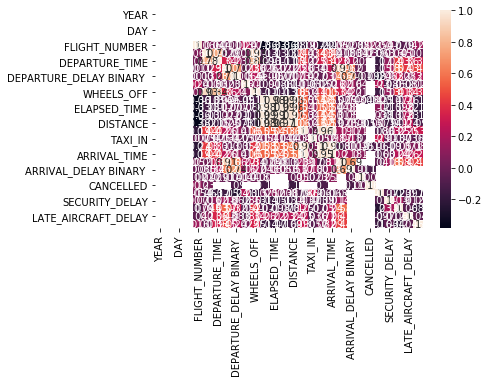

In [6]:
sns.heatmap(dataset.corr(),annot=True)

Text(0.5, 1.0, 'SCHEDULED_ARRIVAL vs ARRIVAL_TIME ')

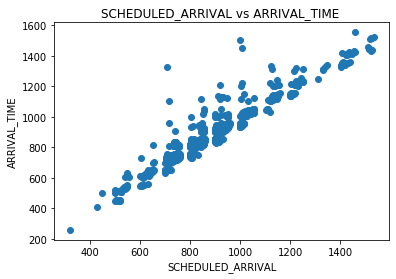

In [7]:
plt.scatter(dataset['SCHEDULED_ARRIVAL'],dataset['ARRIVAL_TIME'])
plt.xlabel('SCHEDULED_ARRIVAL') 
plt.ylabel('ARRIVAL_TIME') 
plt.title('SCHEDULED_ARRIVAL vs ARRIVAL_TIME ')  

Text(0.5, 1.0, 'DAY vs CANCELLED')

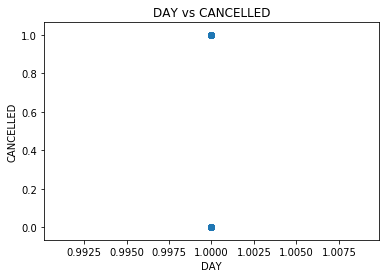

In [8]:
plt.scatter(dataset['DAY'],dataset['CANCELLED'])
plt.xlabel('DAY') 
plt.ylabel('CANCELLED') 
plt.title('DAY vs CANCELLED')  

Text(0.5, 1.0, 'SCHEDULED_DEPARTURE vs DEPARTURE_TIME ')

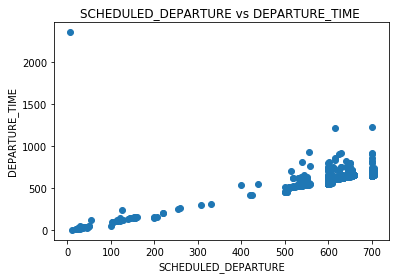

In [9]:
plt.scatter(dataset['SCHEDULED_DEPARTURE'],dataset['DEPARTURE_TIME'])
plt.xlabel('SCHEDULED_DEPARTURE') 
plt.ylabel('DEPARTURE_TIME') 
plt.title('SCHEDULED_DEPARTURE vs DEPARTURE_TIME ')  

Text(0.5, 1.0, 'FLIGHT_NUMBER vs CANCELLED')

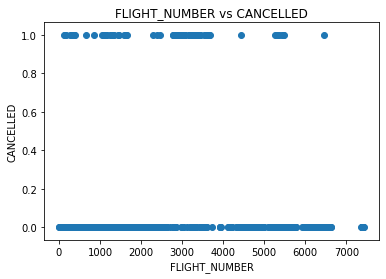

In [10]:
plt.scatter(dataset['FLIGHT_NUMBER'],dataset['CANCELLED'])
plt.xlabel('FLIGHT_NUMBER') 
plt.ylabel('CANCELLED') 
plt.title('FLIGHT_NUMBER vs CANCELLED')  

In [11]:
#Removing useless columns in dataset
dataset.drop(['YEAR','CANCELLATION_REASON','WEATHER_DELAY','SECURITY_DELAY','AIR_SYSTEM_DELAY','TAIL_NUMBER'],axis=1,inplace=True)
dataset.drop(['ELAPSED_TIME','TAXI_IN','TAXI_OUT'],axis=1,inplace=True)
dataset.drop(['AIRLINE_DELAY','LATE_AIRCRAFT_DELAY'],axis=1,inplace=True)
dataset.drop(['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DIVERTED','CANCELLED'],axis=1,inplace=True)


In [12]:
dataset

,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DEPARTURE_DELAY BINARY,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,ARRIVAL_DELAY BINARY
0,98,5,2354.0,-11.0,0,15.0,205,169.0,1448,404.0,430,408.0,-22.0,0
1,2336,10,2.0,-8.0,0,14.0,280,263.0,2330,737.0,750,741.0,-9.0,0
2,840,20,18.0,-2.0,0,34.0,286,266.0,2296,800.0,806,811.0,5.0,0
3,258,20,15.0,-5.0,0,30.0,285,258.0,2342,748.0,805,756.0,-9.0,0
4,135,25,24.0,-1.0,0,35.0,235,199.0,1448,254.0,320,259.0,-21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,893,705,709.0,4.0,0,717.0,220,212.0,1642,1249.0,1245,1253.0,8.0,0
995,552,705,734.0,29.0,1,745.0,95,81.0,496,806.0,740,810.0,30.0,1
996,3239,705,703.0,-2.0,0,712.0,140,111.0,842,903.0,925,907.0,-18.0,0
997,1912,705,658.0,-7.0,0,716.0,110,83.0,639,839.0,855,846.0,-9.0,0


In [13]:
dataset.isnull().any()

FLIGHT_NUMBER              False
SCHEDULED_DEPARTURE        False
DEPARTURE_TIME              True
DEPARTURE_DELAY             True
DEPARTURE_DELAY BINARY     False
WHEELS_OFF                  True
SCHEDULED_TIME             False
AIR_TIME                    True
DISTANCE                   False
WHEELS_ON                   True
SCHEDULED_ARRIVAL          False
ARRIVAL_TIME                True
ARRIVAL_DELAY               True
ARRIVAL_DELAY BINARY       False
dtype: bool

In [14]:
dataset.isnull().sum()

FLIGHT_NUMBER               0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME             84
DEPARTURE_DELAY            84
DEPARTURE_DELAY BINARY      0
WHEELS_OFF                 84
SCHEDULED_TIME              0
AIR_TIME                   85
DISTANCE                    0
WHEELS_ON                  84
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME               84
ARRIVAL_DELAY              85
ARRIVAL_DELAY BINARY        0
dtype: int64

In [15]:
dataset['DEPARTURE_TIME'].fillna((dataset['DEPARTURE_TIME'].mean()),inplace=True)
dataset['DEPARTURE_DELAY'].fillna((dataset['DEPARTURE_DELAY'].mean()),inplace=True)
dataset['WHEELS_OFF'].fillna((dataset['WHEELS_OFF'].mean()),inplace=True)
dataset['AIR_TIME'].fillna((dataset['AIR_TIME'].mean()),inplace=True)
dataset['WHEELS_ON'].fillna((dataset['WHEELS_ON'].mean()),inplace=True)
dataset['ARRIVAL_TIME'].fillna((dataset['ARRIVAL_TIME'].mean()),inplace=True)
dataset['ARRIVAL_DELAY'].fillna((dataset['ARRIVAL_DELAY'].mean()),inplace=True)
dataset['DEPARTURE_TIME']=dataset['DEPARTURE_TIME'].round()
dataset['DEPARTURE_DELAY']=dataset['DEPARTURE_DELAY'].round()
dataset['WHEELS_OFF']=dataset['WHEELS_OFF'].round()
dataset['AIR_TIME']=dataset['AIR_TIME'].round()
dataset['WHEELS_ON']=dataset['WHEELS_ON'].round()
dataset['ARRIVAL_TIME']=dataset['ARRIVAL_TIME'].round()
dataset['ARRIVAL_DELAY']=dataset['ARRIVAL_DELAY'].round()

In [16]:
dataset

,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DEPARTURE_DELAY BINARY,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,ARRIVAL_DELAY BINARY
0,98,5,2354.0,-11.0,0,15.0,205,169.0,1448,404.0,430,408.0,-22.0,0
1,2336,10,2.0,-8.0,0,14.0,280,263.0,2330,737.0,750,741.0,-9.0,0
2,840,20,18.0,-2.0,0,34.0,286,266.0,2296,800.0,806,811.0,5.0,0
3,258,20,15.0,-5.0,0,30.0,285,258.0,2342,748.0,805,756.0,-9.0,0
4,135,25,24.0,-1.0,0,35.0,235,199.0,1448,254.0,320,259.0,-21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,893,705,709.0,4.0,0,717.0,220,212.0,1642,1249.0,1245,1253.0,8.0,0
995,552,705,734.0,29.0,1,745.0,95,81.0,496,806.0,740,810.0,30.0,1
996,3239,705,703.0,-2.0,0,712.0,140,111.0,842,903.0,925,907.0,-18.0,0
997,1912,705,658.0,-7.0,0,716.0,110,83.0,639,839.0,855,846.0,-9.0,0


In [17]:
dataset.isnull().any()

FLIGHT_NUMBER              False
SCHEDULED_DEPARTURE        False
DEPARTURE_TIME             False
DEPARTURE_DELAY            False
DEPARTURE_DELAY BINARY     False
WHEELS_OFF                 False
SCHEDULED_TIME             False
AIR_TIME                   False
DISTANCE                   False
WHEELS_ON                  False
SCHEDULED_ARRIVAL          False
ARRIVAL_TIME               False
ARRIVAL_DELAY              False
ARRIVAL_DELAY BINARY       False
dtype: bool

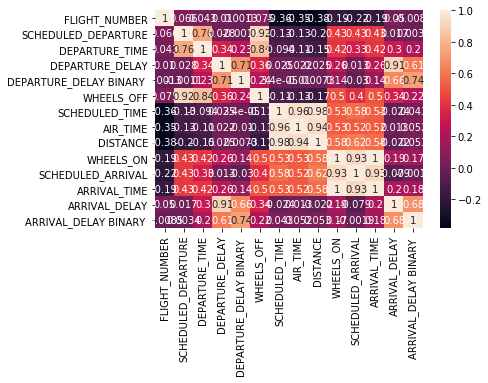

In [18]:
sns.heatmap(dataset.corr(),annot=True)

In [19]:
y=dataset.iloc[:,13:14].values
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [20]:
dataset.drop(['ARRIVAL_DELAY BINARY ','ARRIVAL_DELAY'],axis=1,inplace=True)

In [21]:
x=dataset
x

,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DEPARTURE_DELAY BINARY,WHEELS_OFF,SCHEDULED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,98,5,2354.0,-11.0,0,15.0,205,169.0,1448,404.0,430,408.0
1,2336,10,2.0,-8.0,0,14.0,280,263.0,2330,737.0,750,741.0
2,840,20,18.0,-2.0,0,34.0,286,266.0,2296,800.0,806,811.0
3,258,20,15.0,-5.0,0,30.0,285,258.0,2342,748.0,805,756.0
4,135,25,24.0,-1.0,0,35.0,235,199.0,1448,254.0,320,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,893,705,709.0,4.0,0,717.0,220,212.0,1642,1249.0,1245,1253.0
995,552,705,734.0,29.0,1,745.0,95,81.0,496,806.0,740,810.0
996,3239,705,703.0,-2.0,0,712.0,140,111.0,842,903.0,925,907.0
997,1912,705,658.0,-7.0,0,716.0,110,83.0,639,839.0,855,846.0


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=5)

In [23]:
x_train.shape

(799, 12)

In [24]:
x_test.shape

(200, 12)

In [25]:
y_train.shape

(799, 1)

In [26]:
y_test.shape

(200, 1)

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [28]:
import pickle
pickle.dump(model,open('flight1.pkl','wb'))

In [29]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [30]:
y_test.flatten()

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [31]:
model.score(x_test, y_test)

0.965

In [32]:
accuracy_score(y_test, y_pred) 

0.965

In [33]:
score = f1_score(y_test, y_pred, average='micro')
print('F-Measure: %.3f' % score)

F-Measure: 0.965


In [34]:
precision = precision_score(y_test, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.833


In [35]:
recall = recall_score(y_test, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.870


In [36]:
results = confusion_matrix(y_test, y_pred) 
print(results) 

[[173   4]
 [  3  20]]


In [37]:
cross_val_score(model,x,y.ravel(),cv=5)

array([0.75      , 0.93      , 0.905     , 0.93      , 0.89447236])

In [38]:
cross_val_score(model,x,y.ravel(),cv=10).mean()

0.9409292929292927

C:\Users\Paleti Krishnasai\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


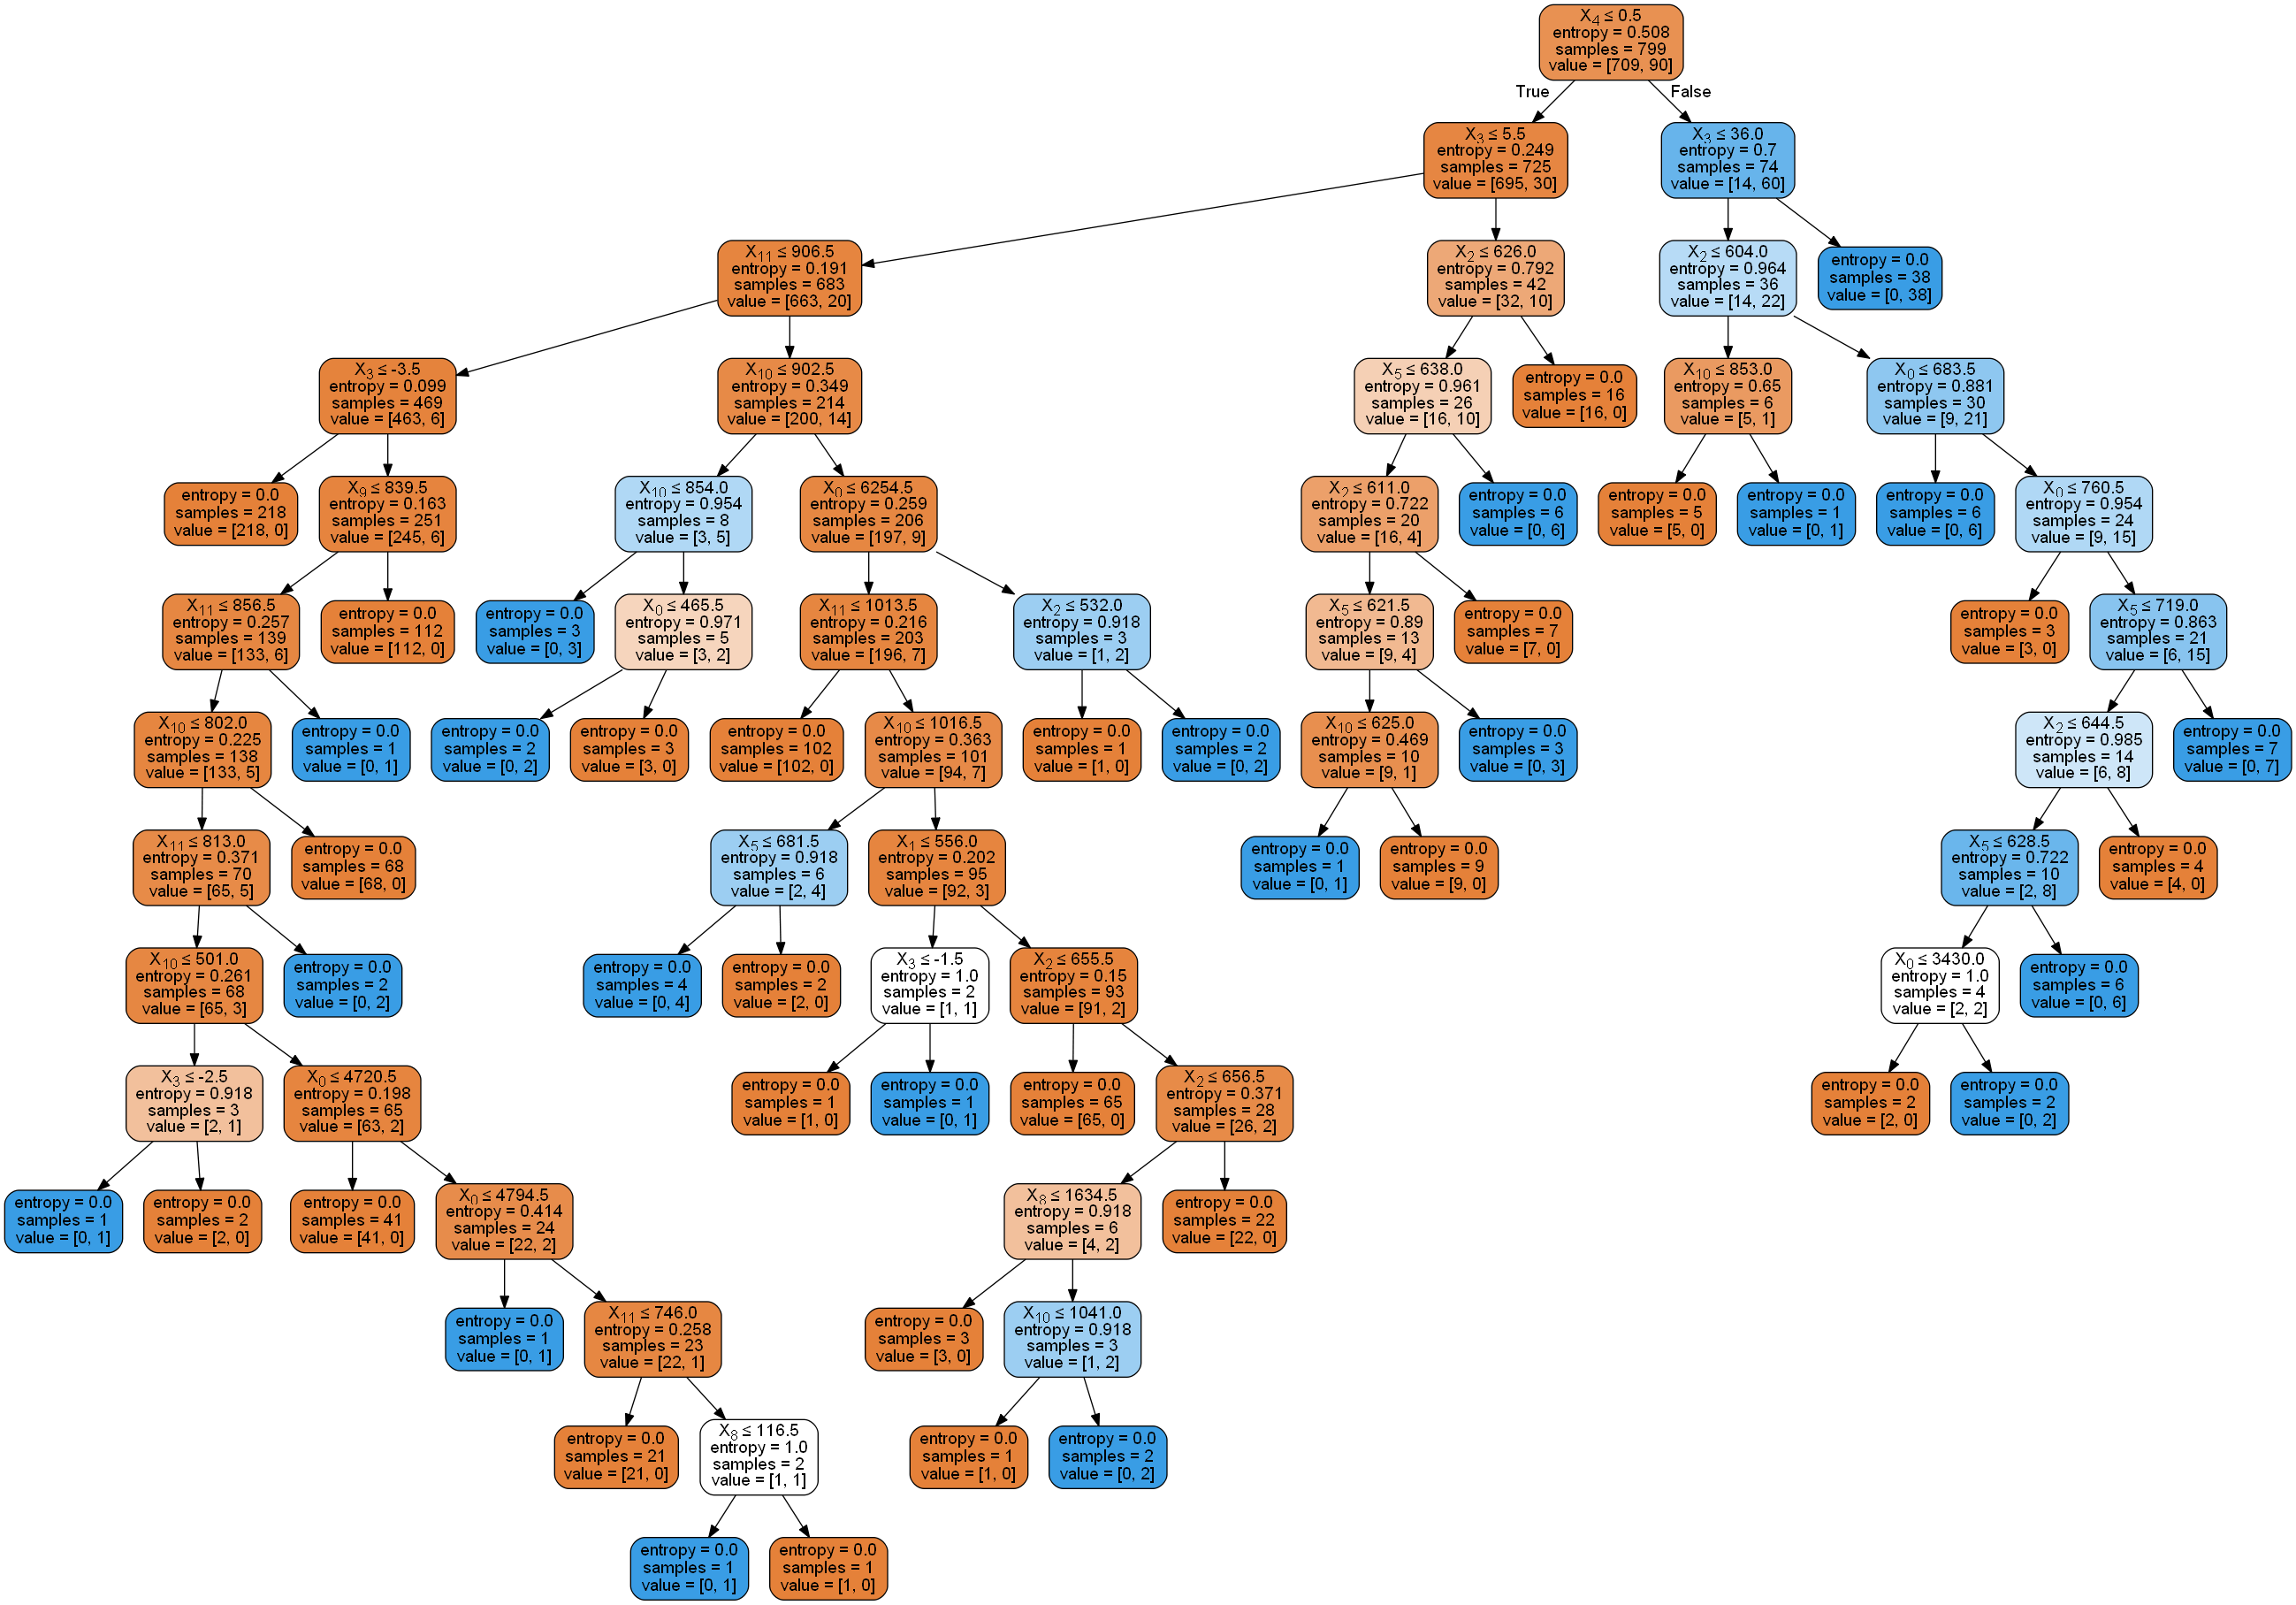

In [39]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())